# Classification

In [1]:
!nvidia-smi

Thu Sep 22 09:50:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.nn import modules, Linear, ReLU

In [ ]:
trainingData=datasets.MNIST('minst_dataset',train=True,download=True,transform=transforms.ToTensor())
trainLoader=torch.utils.data.DataLoader(trainingData,batch_size=64,shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting minst_dataset/MNIST/raw/train-images-idx3-ubyte.gz to minst_dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting minst_dataset/MNIST/raw/train-labels-idx1-ubyte.gz to minst_dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting minst_dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to minst_dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting minst_dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to minst_dataset/MNIST/raw



In [ ]:
model=modules.Sequential(Linear(784,16), ReLU(), Linear(16,16),ReLU(),Linear(16,10))
model.cuda()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-2)

In [ ]:
print_every = 100
for epoch in range(30):
  print('Start of epoch', epoch)
  total_loss = 0
  total_examples = 0
  total_correct = 0

  for i,(X,y) in enumerate(trainLoader):
    X=X.reshape(-1,784).cuda()
    y=y.cuda()

    scores=model(X)
    loss=torch.nn.functional.cross_entropy(scores,y)

    preds = torch.argmax(scores, dim=1)
    num_correct = torch.sum(preds == y)
        
        # Take average
    total_loss += loss.item()
    total_correct += num_correct.item()
    total_examples += len(X)
    if i % print_every == 0:
      print(total_loss / total_examples, total_correct / total_examples)    

    loss.backward()

    with torch.no_grad():
      optimizer.step()
      optimizer.zero_grad()

Start of epoch 0
0.001193392788991332 0.984375
0.0028119120051816916 0.9453898514851485
0.0029012269522318275 0.9440298507462687
0.002954835876914521 0.9439368770764119
0.0030010374294282714 0.9437344139650873
0.003009214355845465 0.9438622754491018
0.003027882224170432 0.9434796173044925
0.003032932601109833 0.9432061340941512
0.0029922305913985046 0.9438397315855181
0.0029926681894313885 0.9438471143174251
Start of epoch 1
0.0011406992562115192 0.984375
0.002998591231823078 0.943069306930693
0.002789649972663173 0.9469838308457711
0.002811928692469497 0.9471034053156147
0.002858815444943999 0.946656795511222
0.002850491141734511 0.9469810379241517
0.0028817202282713852 0.9463654326123128
0.0028656038347138132 0.9466164407988588
0.0028660561087219794 0.9470778714107366
0.0029028936462517163 0.9466044672586016
Start of epoch 2
0.002389076165854931 0.96875
0.0028187301210738664 0.9491027227722773
0.0028424254338116853 0.9489272388059702
0.0028533821981021226 0.9485049833887044
0.0029113

KeyboardInterrupt: ignored

# Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.nn import modules, Linear, ReLU

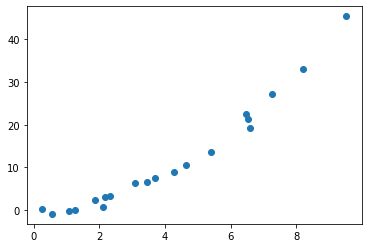

In [ ]:
xs = np.array([1.26195692, 2.12138367, 7.26816902, 3.4602858 , 4.65026994,
       4.26791381, 6.45078699, 0.56133695, 8.20003692, 1.07599647,
       2.17920779, 3.69037797, 6.5877646 , 2.31469817, 3.08669268,
       6.51207026, 5.41313665, 9.52138541, 1.85449396, 0.25468481])

ys = np.array([-0.09572352,  0.78253144, 27.18895577,  6.56553486, 10.45116589,
        8.93004474, 22.60974705, -0.91930108, 33.10927711, -0.24198629,
        3.02331702,  7.4888018 , 19.33644201,  3.23940562,  6.37680298,
       21.3013728 , 13.63284857, 45.44334369,  2.27967531,  0.30643293])

plt.scatter(xs, ys)

In [ ]:
xs = torch.tensor(xs).float().reshape(20, 1).cuda()    # (N, Din) = (20, 1)
ys = torch.tensor(ys).float().reshape(20, 1).cuda()    # (N, Dout)

In [ ]:
model=modules.Sequential(Linear(1,16),ReLU(),Linear(16,16),ReLU(),Linear(16,1))
model = model.cuda()

optimizer=torch.optim.SGD(model.parameters(),lr=1e-5,momentum=0.9)

In [ ]:
print_every = 100

for epoch in range(10000):
  y_pred=model(xs)

  loss=torch.nn.functional.mse_loss(y_pred,ys)

  if epoch % print_every == 0:
        print(epoch, loss)

  loss.backward()

  with torch.no_grad():
    optimizer.step()
    optimizer.zero_grad()

0 tensor(293.9132, device='cuda:0', grad_fn=<MseLossBackward0>)
100 tensor(32.1742, device='cuda:0', grad_fn=<MseLossBackward0>)
200 tensor(28.5600, device='cuda:0', grad_fn=<MseLossBackward0>)
300 tensor(26.4024, device='cuda:0', grad_fn=<MseLossBackward0>)
400 tensor(24.4158, device='cuda:0', grad_fn=<MseLossBackward0>)
500 tensor(22.5670, device='cuda:0', grad_fn=<MseLossBackward0>)
600 tensor(20.8279, device='cuda:0', grad_fn=<MseLossBackward0>)
700 tensor(19.1814, device='cuda:0', grad_fn=<MseLossBackward0>)
800 tensor(17.6235, device='cuda:0', grad_fn=<MseLossBackward0>)
900 tensor(16.1462, device='cuda:0', grad_fn=<MseLossBackward0>)
1000 tensor(14.7423, device='cuda:0', grad_fn=<MseLossBackward0>)
1100 tensor(13.4414, device='cuda:0', grad_fn=<MseLossBackward0>)
1200 tensor(12.2676, device='cuda:0', grad_fn=<MseLossBackward0>)
1300 tensor(11.1866, device='cuda:0', grad_fn=<MseLossBackward0>)
1400 tensor(10.1945, device='cuda:0', grad_fn=<MseLossBackward0>)
1500 tensor(9.3696, d

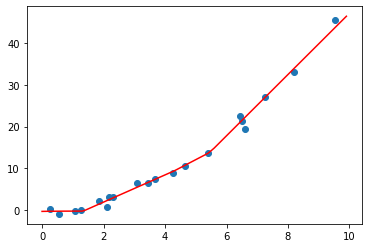

In [ ]:
model = model.cpu()
x = torch.arange(0, 10, 0.1).reshape(-1, 1)

with torch.no_grad():
    y = model(x)

plt.scatter(xs.cpu(), ys.cpu())
plt.plot(x, y, 'r')